https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('dark_background')


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/EDA_project/'
df = pd.read_csv(path + "restaurants.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.shape

(51717, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

# **1. Data cleaning**

**1.1. Removing unnecessary columns**

In [ ]:
df.drop(columns=['url','phone','dish_liked'], inplace=True)

**1.2 Handling NULL values**

In [ ]:
df.isna().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isna().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

**1.3 Renamimg columns**

In [ ]:
df.rename(columns={"listed_in(type)": "type_of_meal", "listed_in(city)": "city" , "approx_cost(for two people)": "cost"},inplace=True)
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type_of_meal', 'city'],
      dtype='object')

**1.4 Data Type transformation**

In [ ]:
#Converting cost type to float
print(df.cost.dtypes) 
df.cost = df.cost.astype('string') 

df.cost = df.cost.str.replace(',','')

df.cost = df.cost.astype('float')
print(df.cost.dtypes)

object
float64


In [ ]:
df.cost.value_counts()

300.0     5715
400.0     5537
500.0     4298
200.0     3518
600.0     3342
          ... 
560.0        1
360.0        1
5000.0       1
3700.0       1
160.0        1
Name: cost, Length: 66, dtype: int64

In [ ]:
df.rate.unique()
#Getting rid of '-' and 'NEW' and Converting rate type to float 
df = df[(df.rate != 'NEW') & (df.rate != '-')]
df.rate = df.rate.str[0:3]
df.rate = df.rate.astype('float')
df.rate.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [ ]:
#Convert all 'Yes' and 'No' in Data Frame to True and False
df.replace({'Yes':True,'No':False},inplace = True)


**1.3 Handling duplicates**

In [ ]:
# Cheking for duplicates
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)
print(df.duplicated().sum())

26
0


**Checking for restaurants with few branches**

In [ ]:
df.shape

(41237, 14)

In [ ]:
df_grp_address_name = df.drop_duplicates(subset=['address','name'])

In [ ]:
#Number of restaurants in data(branches)
df_grp_address_name.shape[0]

9438

In [ ]:
df.duplicated(subset=['address','name','type_of_meal']).sum()

24709

In [ ]:
df_grp_address_name_type_of_meal = df.drop_duplicates(subset=['address','name','type_of_meal'])

In [ ]:
df_grp_address_name_type_of_meal.shape

(16528, 14)

In [ ]:
df_grp_name = df.drop_duplicates(subset=['name'])

In [ ]:
print('Number of Restaurant\'s branches in data:',df_grp_address_name.shape[0])
print('Number of Restaurant chain in data:',df_grp_name.shape[0])

Number of Restaurant's branches in data: 9438
Number of Restaurant chain in data: 6602


# **2. Data investigation**

In [ ]:
# df_grp_address_name.corr()

,online_order,book_table,rate,votes,cost
online_order,1.000000,-0.061734,0.065144,0.005209,-0.135149
book_table,-0.061734,1.000000,0.378057,0.380080,0.599411
rate,0.065144,0.378057,1.000000,0.400385,0.330861
votes,0.005209,0.380080,0.400385,1.000000,0.339609
cost,-0.135149,0.599411,0.330861,0.339609,1.000000


How much restaurants have more than one branch?

In [ ]:
df_with_few_branches = df_grp_address_name[df_grp_address_name\
                                                                .duplicated(['name'],keep=False)].sort_values('name',ascending=False)

print(df_with_few_branches.name.nunique())
df_with_few_branches

970


,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type_of_meal,city
7110,"Ground Floor-Lobby Area, Brigade IRV Centre, N...",nu.tree,True,False,4.3,170,Whitefield,"Quick Bites, Beverage Shop","North Indian, Healthy Food, Beverages",400.0,"[('Rated 5.0', 'RATED\n This is second time I...","['Fruit Porridge Meal', 'Dum Aloo and Chapathi...",Delivery,Brookefield
3812,"36 Aarush, Sri Balaji Layout, Ambulipura, Sarj...",nu.tree,True,False,4.4,278,Sarjapur Road,Delivery,"North Indian, Healthy Food, Beverages",400.0,"[('Rated 4.0', 'RATED\n I ordered their veg m...",[],Delivery,Bellandur
51376,"12th Floor, Gamma Building, Sigma Soft Tech Pa...",nu.tree,True,False,4.2,52,Whitefield,Quick Bites,"North Indian, Healthy Food, Beverages",400.0,"[('Rated 5.0', 'RATED\n Palak is my favourite...",[],Dine-out,Whitefield
45561,"2981, 12th Main Road, HAL 2nd Stage, Indiranag...",eat.fit,True,True,3.9,42,Indiranagar,Quick Bites,"Healthy Food, North Indian, Biryani, Continent...",300.0,"[('Rated 2.0', 'RATED\n All these days I like...",[],Desserts,Old Airport Road
14655,"1/8, 1st Stage, 1st Cross, KK Computers Buildi...",eat.fit,True,False,4.5,857,Indiranagar,Delivery,"Healthy Food, North Indian, Biryani, Continent...",500.0,"[('Rated 2.0', 'RATED\n IÃ\x83Ã\x83Ã\x82Ã...","['Chicken Tikka Super Sub', 'Tofu Keema Parant...",Delivery,Frazer Town
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39411,"5, 4th Floor, Above GIRIAS, 15th Cross, Malles...",1947,False,True,4.0,1070,Malleshwaram,Casual Dining,"North Indian, Chinese",950.0,"[('Rated 4.0', 'RATED\n Went here for a buffe...",[],Buffet,Malleshwaram
46141,"5, Ground Floor, Number 2, First Main, Industr...",1947,False,True,3.9,621,Rajajinagar,Casual Dining,"North Indian, Chinese, Continental",1000.0,"[('Rated 4.0', ""RATED\n The decor of the rest...",[],Buffet,Rajajinagar
44423,"23, 3rd Floor, Devaraja Arcade, Beside ICICI B...",1522 - The Pub,False,False,4.3,969,New BEL Road,Pub,"Chinese, Continental, North Indian",1400.0,"[('Rated 4.0', 'RATED\n I love this place. on...",[],Dine-out,New BEL Road
39945,"1522, 17th Cross, Malleshwaram, Bangalore",1522 - The Pub,True,False,4.2,1731,Malleshwaram,Pub,"Chinese, Continental, North Indian",1400.0,"[('Rated 4.0', 'RATED\n A great resto bar to ...",[],Delivery,Malleshwaram


We can see than it possible that in one branch it allow to book a table and in another one it's not althougt they are belong to the same chain (like "eat.fit")
Also it possible that in one branch it allow to have an online order and in another one it's not althougt they are belong to the same chain (like "1522-The pub")

Which is the Restaurant chain with most branches?

In [ ]:
df_grp_address_name.name.value_counts().head(1)

Cafe Coffee Day    49
Name: name, dtype: int64

How much branches allowing online orders?





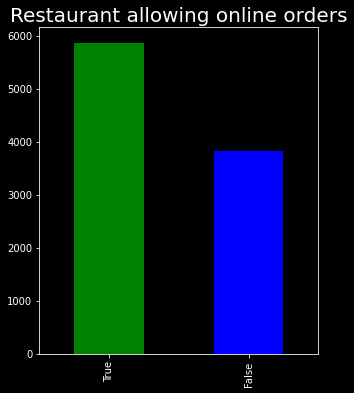

In [ ]:
df.drop_duplicates(subset=['address','name','online_order']).online_order.value_counts().plot(kind="bar", color=['green','blue'],\
                                                figsize = (5,6), fontsize=10, title='Restaurant allowing online orders').axes.title.set_size(20)

How much restaurants allowing book table?

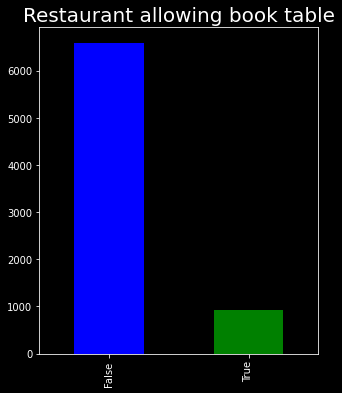

In [ ]:
df[df.type_of_meal != 'Delivery'].drop_duplicates(subset=['address','name','book_table']).book_table.value_counts()\
                                                  .plot(kind="bar", color=['blue','green'],\
                                                  figsize = (5,6), fontsize=10, title='Restaurant allowing book table').axes.title.set_size(20)

What is the precentage of restaurant allowing book table for each rate?

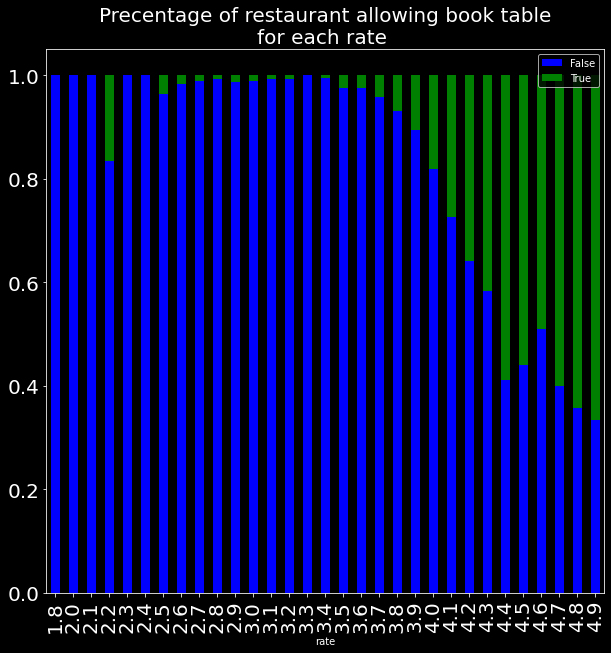

In [ ]:
df_no_repeat = df.drop_duplicates(subset=['address','name','book_table'])

df_rate_book_table = pd.crosstab(df_no_repeat.rate, df_no_repeat.book_table)
df_rate_book_table.div(df_rate_book_table.sum(1).astype('float'),axis=0)\
                  .plot(kind='bar',stacked=True,color=['blue','green'],figsize = (10,10), fontsize=20, title='Precentage of restaurant allowing book table\nfor each rate ')\
                  .axes.title.set_size(20)
plt.legend(loc='upper right')

Which places have the most restaurants?

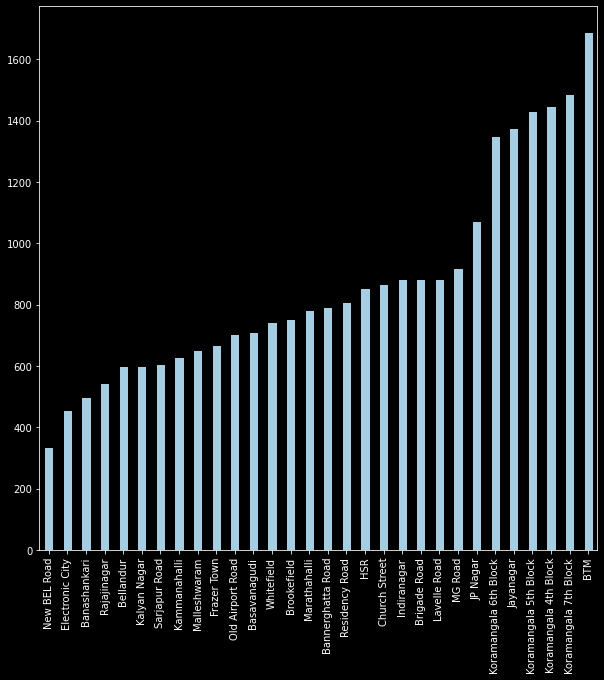

In [ ]:
df_no_repeat = df.drop_duplicates(subset=['address','name','city'])
df_no_repeat.city.value_counts(ascending=True).plot(kind='bar',figsize = (10,10),colormap='Paired',edgecolor='black',fontsize=10)

Which ten places has the most high-rated restaurants? (High rate = 4 or more)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


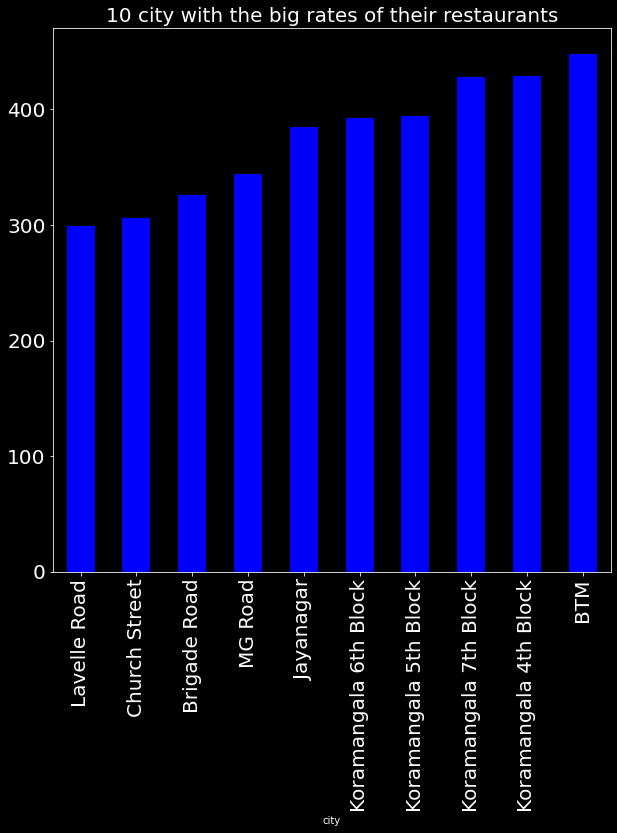

In [ ]:
df_no_repeat = df.drop_duplicates(subset=['address','name','city','rate'])
df_no_repeat['is_high_rate'] = np.where(df_no_repeat['rate'] >= 4,True,False)
df_no_repeat_is_high_rate = df_no_repeat[df_no_repeat.is_high_rate == True]


df_rate_city_table = pd.crosstab(df_no_repeat_is_high_rate.city,df_no_repeat_is_high_rate.is_high_rate).sort_values(by=True,ascending=False)
df_rate_city_table.head(10).sort_values(by=True,ascending=True)\
                           .plot(kind='bar',color=['blue','green'],figsize = (10,10), fontsize=20, title='10 city with the big rates of their restaurants',legend=None)\
                           .axes.title.set_size(20)


*That good but stil not enough...
We need to check the precntage

Which ten places have the percentage of restaurants with the highest rate out of the total number of restaurants in those places

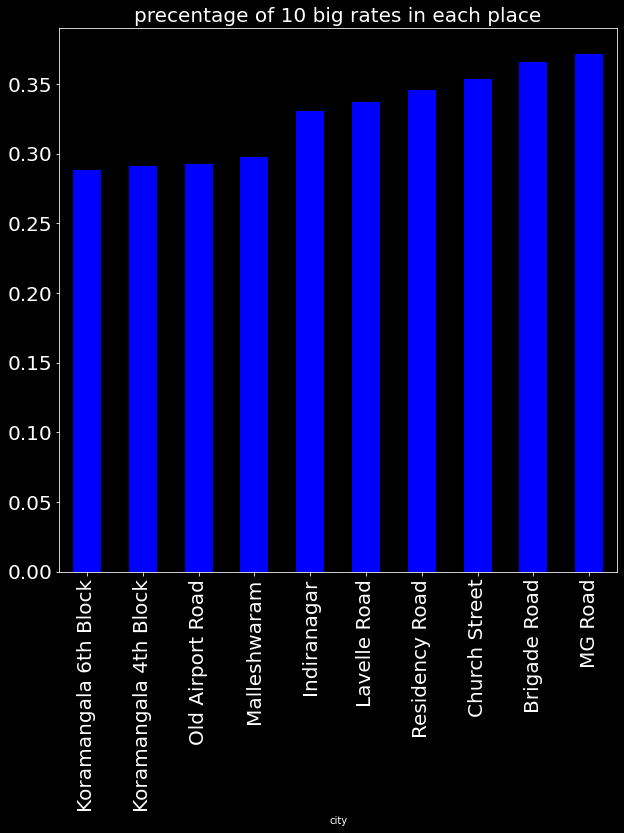

In [ ]:
df_rate_city_table = pd.crosstab(df_no_repeat.city,df_no_repeat.is_high_rate).sort_values(by=True,ascending=True)
df_rate_city_table
df_rate_city_table.div(df_rate_city_table.sum(1).astype('float'),axis=0)[True].sort_values(ascending=True).tail(10)\
                  .plot(kind='bar',color=['blue'],figsize = (10,10), fontsize=20, title='precentage of 10 big rates in each place')\
                  .axes.title.set_size(20)
               

What types of restaurants exist?

In [ ]:
print('The types of restaurant:')
for i,type_of_food in enumerate(df.type_of_meal.unique(),1):
  print(f'{i}.',type_of_food)

# df.duplicated(subset=['name','type_of_meal']).sum()  
# df_name_and_type_of_meal_no_repeat = df.drop_duplicates(subset=['name','type_of_meal']) 
# df_name_and_type_of_meal_no_repeat.duplicated(subset=['name','type_of_meal']).sum() 

The types of restaurant:
1. Buffet
2. Cafes
3. Delivery
4. Desserts
5. Dine-out
6. Drinks & nightlife
7. Pubs and bars


What is the amount type of food offered by the restaurant chains?

In [ ]:
df_no_repeat = df.drop_duplicates(subset=['name','type_of_meal'])
df_no_repeat['key'] = 1
pivot_table_name_and_type_of_meal_no_repeat = df_no_repeat.pivot_table(index='name', columns='type_of_meal'\
                                                                                            ,values='key', aggfunc='count',fill_value=0,margins = True)

pivot_table_name_and_type_of_meal_no_repeat.sort_values(by='All').All[:-1].value_counts()

#3682 restaurants chains have 2 types of food's branches


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2    3682
1    2035
3     685
4     185
5      14
6       1
Name: All, dtype: int64

What is the amount of restaurant chain for each type of food?

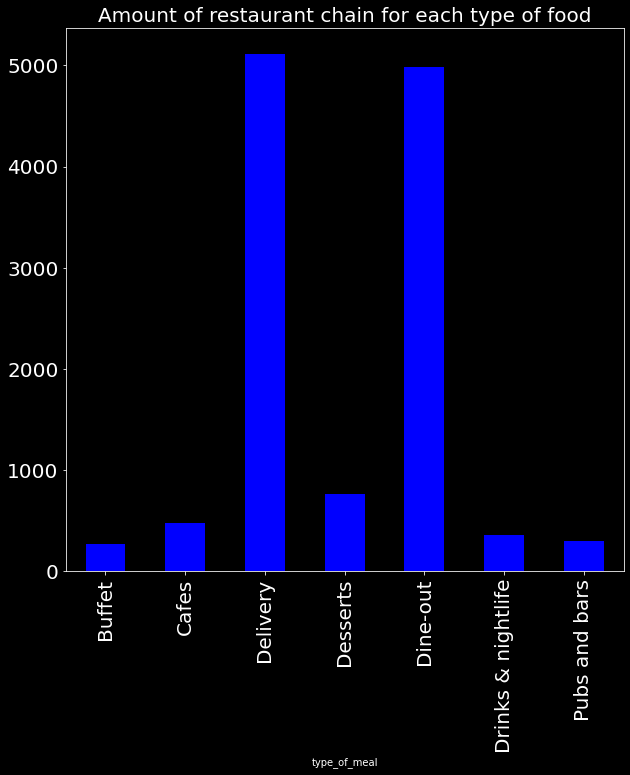

In [ ]:
pivot_table_name_and_type_of_meal_no_repeat.drop('All',inplace = True,axis=1)
pivot_table_name_and_type_of_meal_no_repeat[-1:].transpose().plot(kind='bar',color=['blue'],figsize = (10,10), fontsize=20, \
                                                                        title='Amount of restaurant chain for each type of food',legend=None)\
                                                                        .axes.title.set_size(20)
#270 restaurant chains have at least one branch that offer Buffet

What is the average cost for two in each retaurant type? (in branchs level)

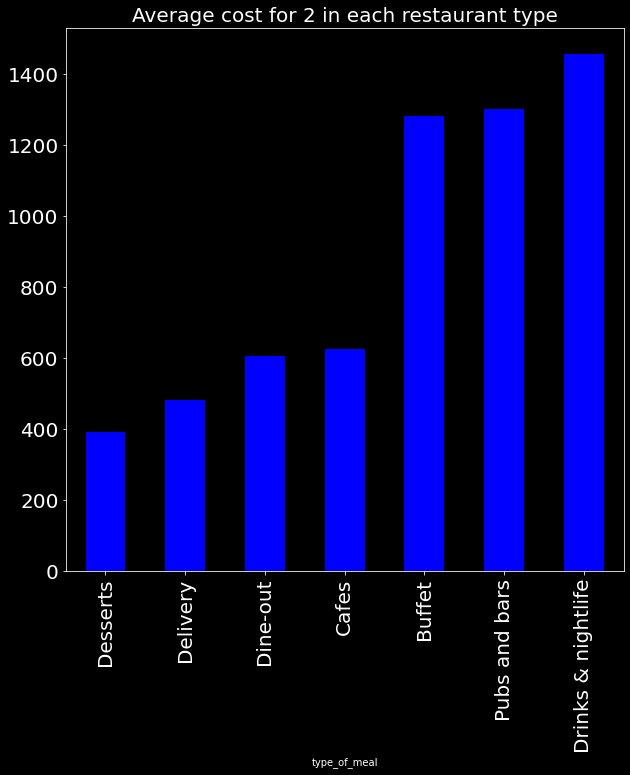

In [ ]:
df_no_repeat = df.drop_duplicates(subset=['address','name','type_of_meal'])
pivot_table_cost_and_type_of_meal_no_repeat = df_no_repeat.pivot_table(index='type_of_meal'\
                                                                                            ,values='cost', aggfunc='mean',fill_value=0)

pivot_table_cost_and_type_of_meal_no_repeat.sort_values(by='cost').plot(kind='bar',color=['blue'],figsize = (10,10), fontsize=20, \
                                                                        title='Average cost for 2 in each restaurant type',legend=None)\
                                                                        .axes.title.set_size(20)

What is the average cost for two in each place?

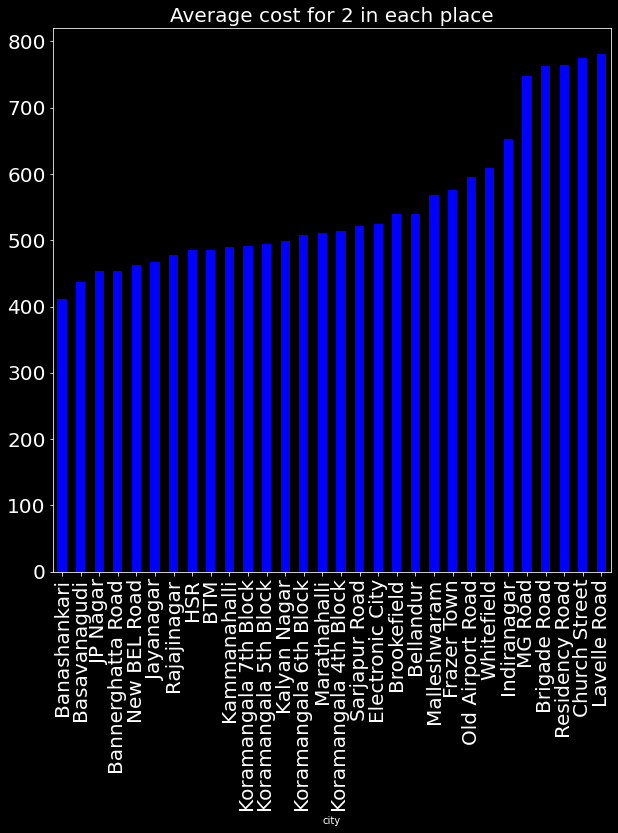

In [ ]:
df_no_repeat = df.drop_duplicates(subset=['address','name','city'])
pivot_table_cost_and_city_no_repeat = df_no_repeat.pivot_table(index='city',values='cost', aggfunc='mean',fill_value=0)

pivot_table_cost_and_city_no_repeat.sort_values(by='cost').plot(kind='bar',color=['blue'], fontsize=20,figsize = (10,10),\
                                                                        title='Average cost for 2 in each place',legend=None)\
                                                                        .axes.title.set_size(20)

# Indian rupee = 0.042 ISL                                                             